In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_demandQ = pd.read_csv("Gold_ demand_quarterly.csv")
df_demandT = pd.read_csv("Gold_ demand_tonnes_yearly.csv")
df_demandS = pd.read_csv("gold_demand_sector.csv")
df_jewellery = pd.read_csv("gold_jewellery_country.csv")
df_reserves = pd.read_csv("Gold_reserves_tonnes.csv")


df_demandS.drop("Unnamed: 6",axis=1,inplace=True)
df_demandS.drop("Unnamed: 7",axis=1,inplace=True)
df_demandS.replace(",", "", regex=True, inplace=True)
df_demandS.iloc[:, 1:] = df_demandS.iloc[:, 1:].apply(pd.to_numeric ,downcast="integer")

### yearly gold demand across different sectors

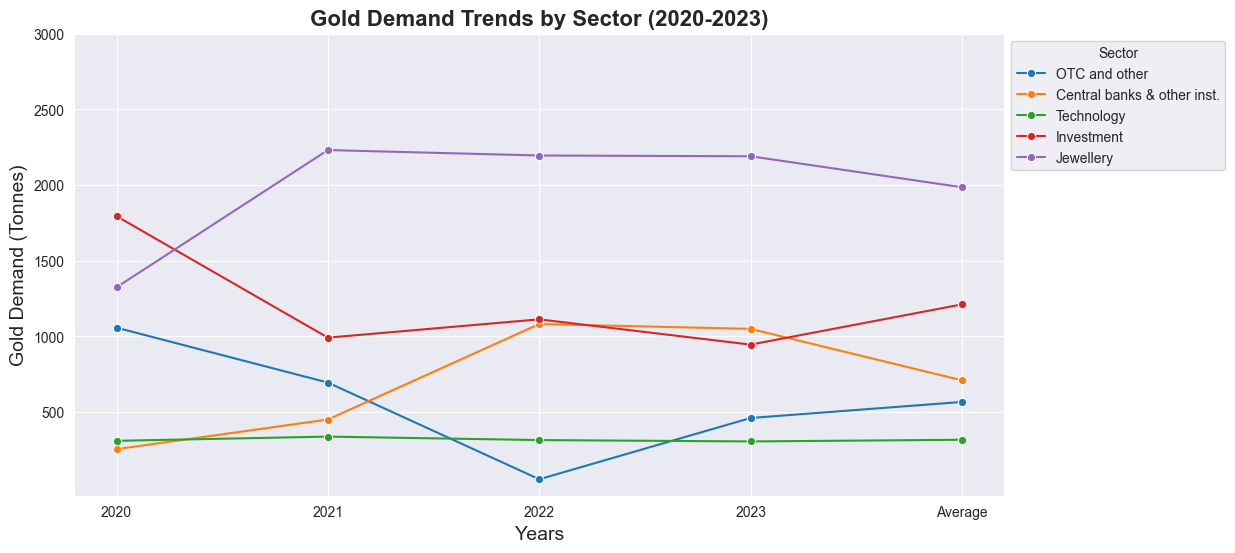

In [114]:
df_demandS1 = df_demandS[df_demandS["country_demand_sector (tonnes)"] != "Total demand"]
df_melted = df_demandS1.melt(id_vars=["country_demand_sector (tonnes)"], 
                            var_name="Year", 
                            value_name="Gold Demand")

years = df_melted["Year"].unique()
df_melted["Year"] = pd.Categorical(df_melted["Year"], categories=years, ordered=True)
df_melted["Gold Demand"] = df_melted["Gold Demand"].astype(int)
df_melted = df_melted.sort_values(by="Gold Demand")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="Year", y="Gold Demand", 
             hue="country_demand_sector (tonnes)", marker="o")
plt.title("Gold Demand Trends by Sector (2020-2023)",fontsize=16,fontweight='bold')
plt.xlabel("Year")
plt.yticks([500,1000,1500,2000,2500,3000])
plt.ylabel("Gold Demand (Tonnes)",fontsize=14)
plt.xlabel("Years",fontsize=14)
plt.legend(title="Sector", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

### Top 10 countries with highest Gold Reserves

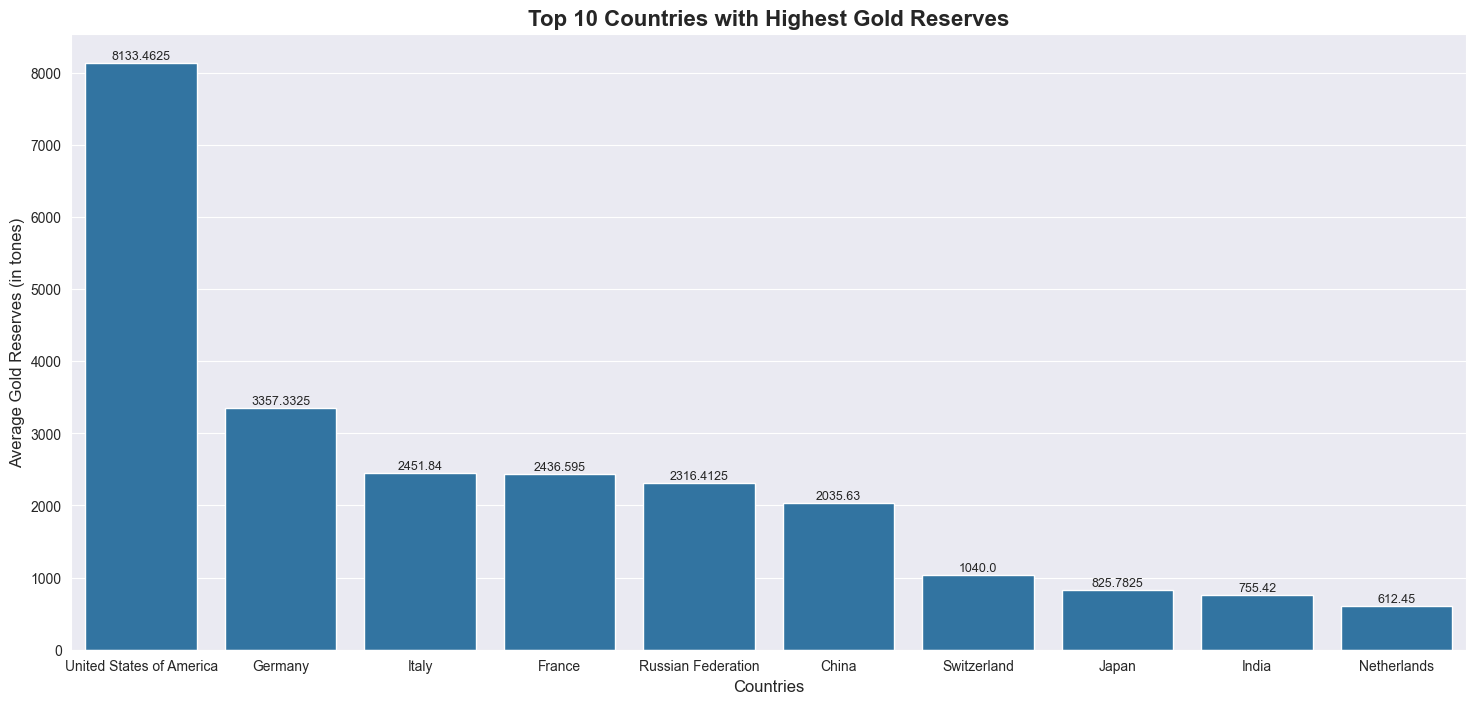

In [111]:
df_reserves.replace(",","",regex=True,inplace=True)
df_reserves.iloc[:, 1:] = df_reserves.iloc[:, 1:].apply(pd.to_numeric ,downcast="integer")

top_reserves = df_reserves.sort_values(by="Average gold reserves", ascending=False).head(10)
plt.figure(figsize=[18,8])

ax = sns.barplot(x=top_reserves["Country"],y=top_reserves["Average gold reserves"])
for index, value in enumerate(top_reserves["Average gold reserves"]):
    plt.text(index, value + 50, str(value), ha="center", fontsize=9)

sns.set_style("dark")
plt.title("Top 10 Countries with Highest Gold Reserves",fontsize=16,fontweight='bold')
plt.ylabel("Average Gold Reserves (in tones)",fontsize=12)
plt.xlabel("Countries",fontsize=12)
plt.grid(axis="y")
plt.show()

### Correlation between gold reserves and gold demand in different countries? (Scatter Plot with Regression Line) 

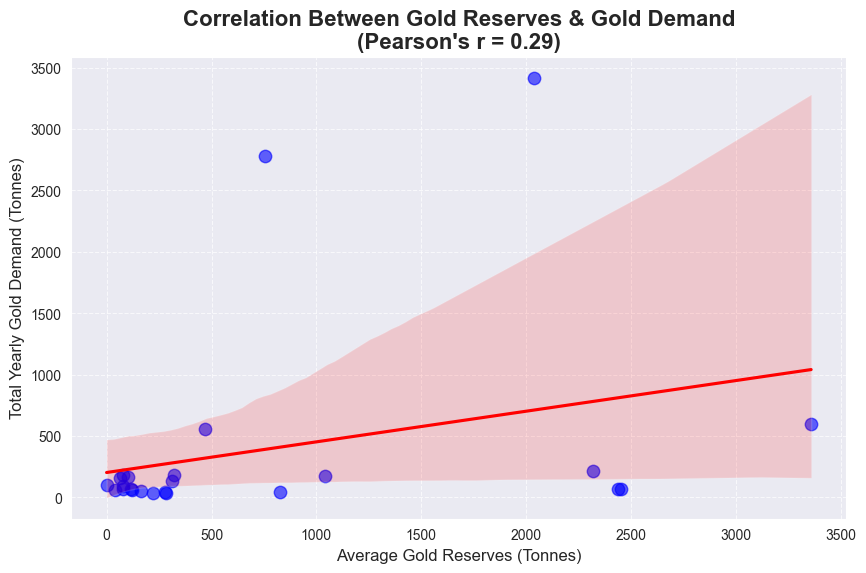

In [110]:
df_demandT.rename(columns={"Countries": "Country"}, inplace=True)

df_reserves.replace(",", "", regex=True, inplace=True)
df_reserves.iloc[:, 1:] = df_reserves.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

df_demandT.iloc[:, 1:] = df_demandT.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

df_reserves["Average gold reserves"] = df_reserves[
    ["2020", "2021", "2022", "2023"]
].mean(axis=1)

df_merged = df_reserves.merge(df_demandT, on="Country", how="inner")

df_merged.rename(columns={
    "2020_x": "Gold Reserves 2020", "2021_x": "Gold Reserves 2021", 
    "2022_x": "Gold Reserves 2022", "2023_x": "Gold Reserves 2023",
    "2020_y": "Gold Demand 2020", "2021_y": "Gold Demand 2021", 
    "2022_y": "Gold Demand 2022", "2023_y": "Gold Demand 2023"
}, inplace=True)

numeric_cols = [
    "Gold Reserves 2020", "Gold Reserves 2021", "Gold Reserves 2022", "Gold Reserves 2023",
    "Gold Demand 2020", "Gold Demand 2021", "Gold Demand 2022", "Gold Demand 2023"
]
df_merged[numeric_cols] = df_merged[numeric_cols].apply(pd.to_numeric, errors="coerce")

df_merged["Total Yearly Gold Demand"] = df_merged[
    ["Gold Demand 2020", "Gold Demand 2021", "Gold Demand 2022", "Gold Demand 2023"]
].sum(axis=1, skipna=True)

df_merged.dropna(subset=["Average gold reserves", "Total Yearly Gold Demand"], inplace=True)
plt.figure(figsize=(10, 6))
ax = sns.regplot(
    x=df_merged["Average gold reserves"], 
    y=df_merged["Total Yearly Gold Demand"], 
    scatter_kws={"color": "blue", "s": 80, "alpha": 0.6}, 
    line_kws={"color": "red"}
)

correlation = df_merged["Average gold reserves"].corr(df_merged["Total Yearly Gold Demand"])

plt.title(f"Correlation Between Gold Reserves & Gold Demand\n(Pearson's r = {correlation:.2f})", fontsize=16,fontweight='bold')
plt.xlabel("Average Gold Reserves (Tonnes)", fontsize=12)
plt.ylabel("Total Yearly Gold Demand (Tonnes)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

### How have gold reserves changed per country from 2020-2023?

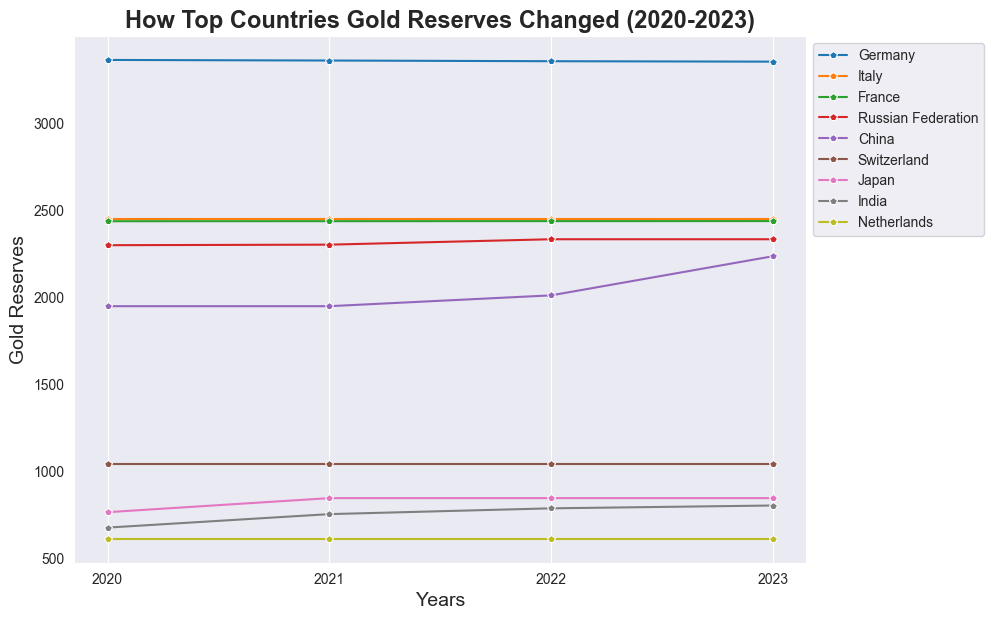

In [109]:

top_reserves = top_reserves[top_reserves["Country"]!= "United States of America"]
top_reserves.drop(columns=["Average gold reserves"])
melt = pd.melt(top_reserves,id_vars=['Country'],value_vars=['2020','2021','2022','2023'],var_name="Years",value_name="Reserves")
plt.figure(figsize=[10,6])
sns.lineplot(x=melt["Years"],y=melt["Reserves"],hue=melt["Country"],style=melt["Country"],dashes=False,marker='p')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.xlabel("Years",fontsize=14)
plt.ylabel("Gold Reserves",fontsize=14)
plt.grid(axis='x')
plt.title("How Top Countries Gold Reserves Changed (2020-2023)",fontsize=17,fontweight='bold')
plt.show()

### How does gold jewelry demand vary across different countries (Except Top Countries)?

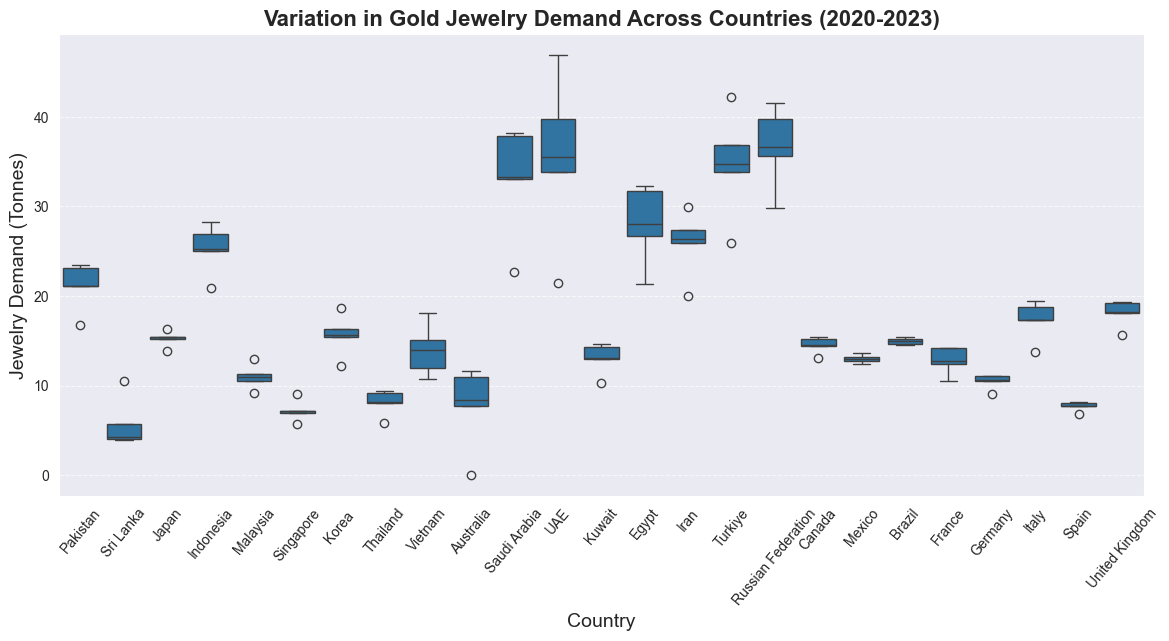

In [108]:
df_jewellery.rename(columns={"Countries": "Country"}, inplace=True)
df_jewellery = df_jewellery[df_jewellery["Country"] != 'India']
df_jewellery = df_jewellery[df_jewellery["Country"] != 'China']
df_jewellery = df_jewellery[df_jewellery["Country"] != 'United States']
df_jewellery.iloc[:, 1:] = df_jewellery.iloc[:, 1:].replace(",", "", regex=True).apply(pd.to_numeric)

df_melted = pd.melt(df_jewellery, id_vars=["Country"], 
                    var_name="Year", value_name="Jewelry Demand (Tonnes)")

plt.figure(figsize=(14, 6))
sns.boxplot(x="Country", y="Jewelry Demand (Tonnes)", data=df_melted)

plt.xticks(rotation=50) 
plt.title("Variation in Gold Jewelry Demand Across Countries (2020-2023)", fontsize=16,fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Jewelry Demand (Tonnes)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### How does yearly gold demand vary across countries?

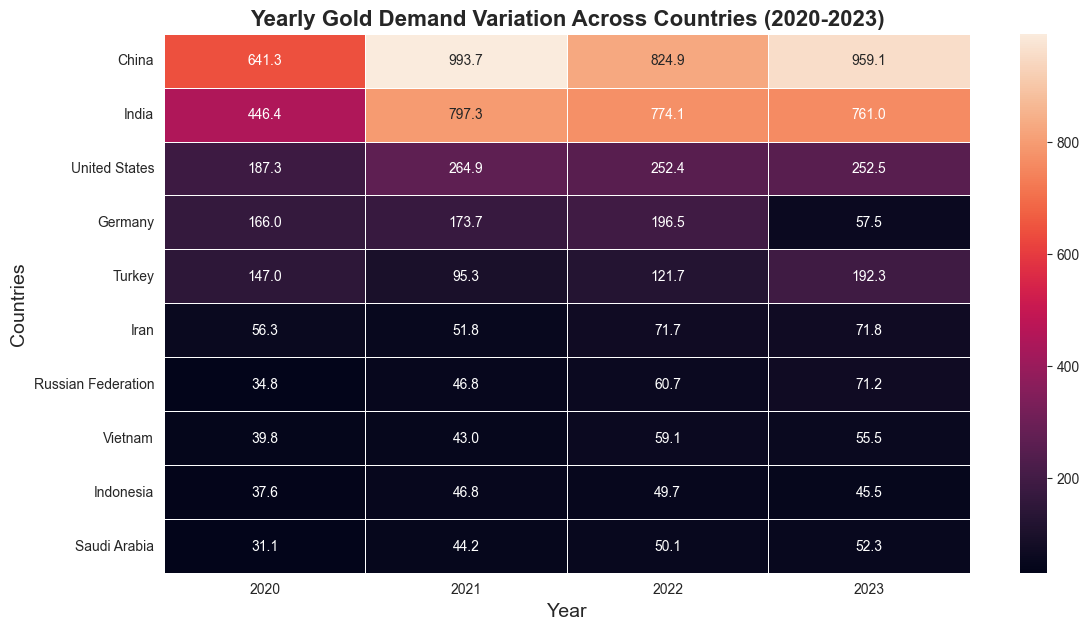

In [106]:
df = pd.read_csv("Gold_ demand_tonnes_yearly.csv")
df.drop(["gold_demand","Year-on-year % change","Average demand"],axis=1,inplace=True)
df["Countries"] = df["Countries"].replace({"Islamic Republic of Iran":"Iran"})
df.set_index("Countries",inplace=True)
plt.figure(figsize=[13,7])
sns.heatmap(df.head(10),annot=True,fmt='.1f',linewidths=0.5)
plt.ylabel("Countries",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.title("Yearly Gold Demand Variation Across Countries (2020-2023)", fontsize=16,fontweight='bold')
plt.show()

### How is the year-over-year percentage change in gold demand distributed, and what are the key trends observed?

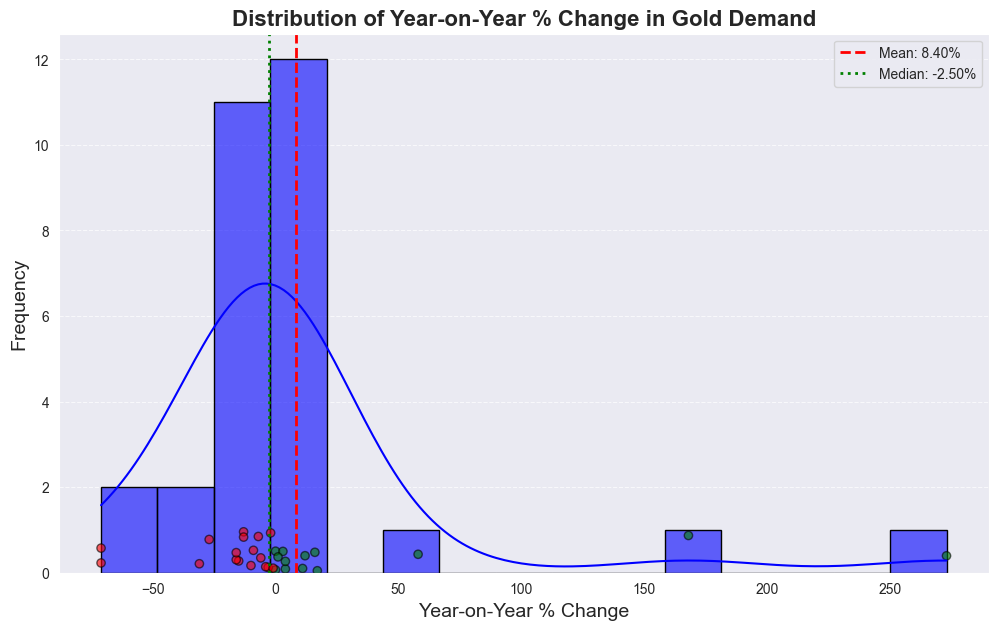

In [105]:
df_demandT.rename(columns={"Countries": "Country"}, inplace=True)
df_demandT["Year-on-year % change"] = pd.to_numeric(df_demandT["Year-on-year % change"], errors='coerce')

df_demandT.dropna(subset=["Year-on-year % change"], inplace=True)

mean_value = df_demandT["Year-on-year % change"].mean()
median_value = df_demandT["Year-on-year % change"].median()

colors = ['red' if x < 0 else 'green' for x in df_demandT["Year-on-year % change"]]

plt.figure(figsize=(12, 7))
sns.histplot(df_demandT["Year-on-year % change"], bins=15, kde=True, color="blue", alpha=0.6, edgecolor='black')

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}%')
plt.axvline(median_value, color='green', linestyle='dotted', linewidth=2, label=f'Median: {median_value:.2f}%')

plt.scatter(df_demandT["Year-on-year % change"], np.random.uniform(0, 1, size=len(df_demandT)), 
            c=colors, alpha=0.6, edgecolors='black', marker="o")

plt.title("Distribution of Year-on-Year % Change in Gold Demand", fontsize=16, fontweight='bold')
plt.xlabel("Year-on-Year % Change", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()